In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from rei.cognitive.messages.tensor_fragment import FragmentTensor
from test.common.basic_graph_creation_functions import create_fano_graph, setup_test_graph_elements, create_multitree, create_simple_tree

# Simple tree
The folllowing example is a simple tree of two edges.

In [3]:
taxon, simple_tree_graph = create_simple_tree()
fragment = setup_test_graph_elements(taxon, simple_tree_graph)

In [4]:
fragment.V

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[1., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 1.],
        [0., 0.],
        [0., 0.]]])

In [5]:
fragment.I

array([[-1., -1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [6]:
np.tensordot(fragment.V.T, np.abs(fragment.I.T), axes=([1,0],[1,0]))

array([0., 1., 1.])

In [7]:
print(fragment.V.shape, fragment.I.shape)

(3, 3, 2) (3, 2)


# Fano graph creation

The Fano-graph is a very useful graph to test hypergraphs.

In [8]:
taxon, fano_graph = create_fano_graph()
fragment = setup_test_graph_elements(taxon, fano_graph)

In [9]:
np.sum(fragment.V, axis=2)

array([[0., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 0.]])

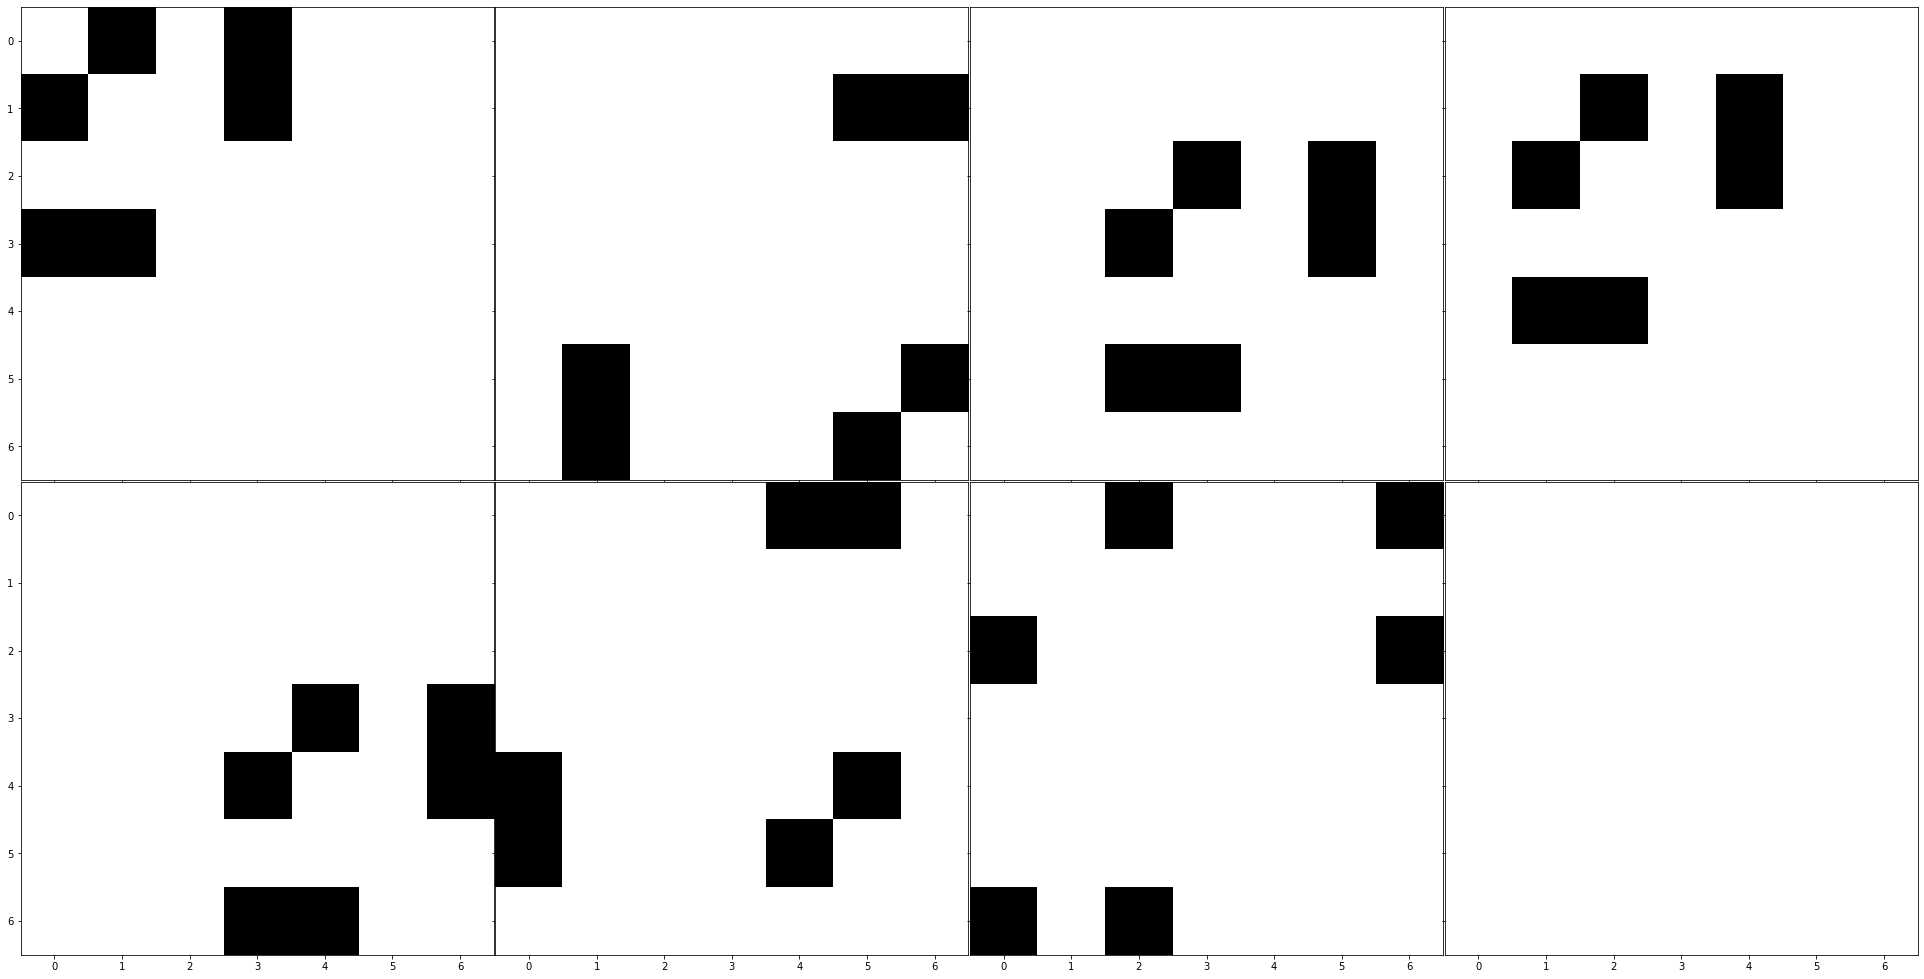

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 4))
for ax, im in zip(grid, fragment.V.T):
    ax.imshow(im, cmap=cm.binary)

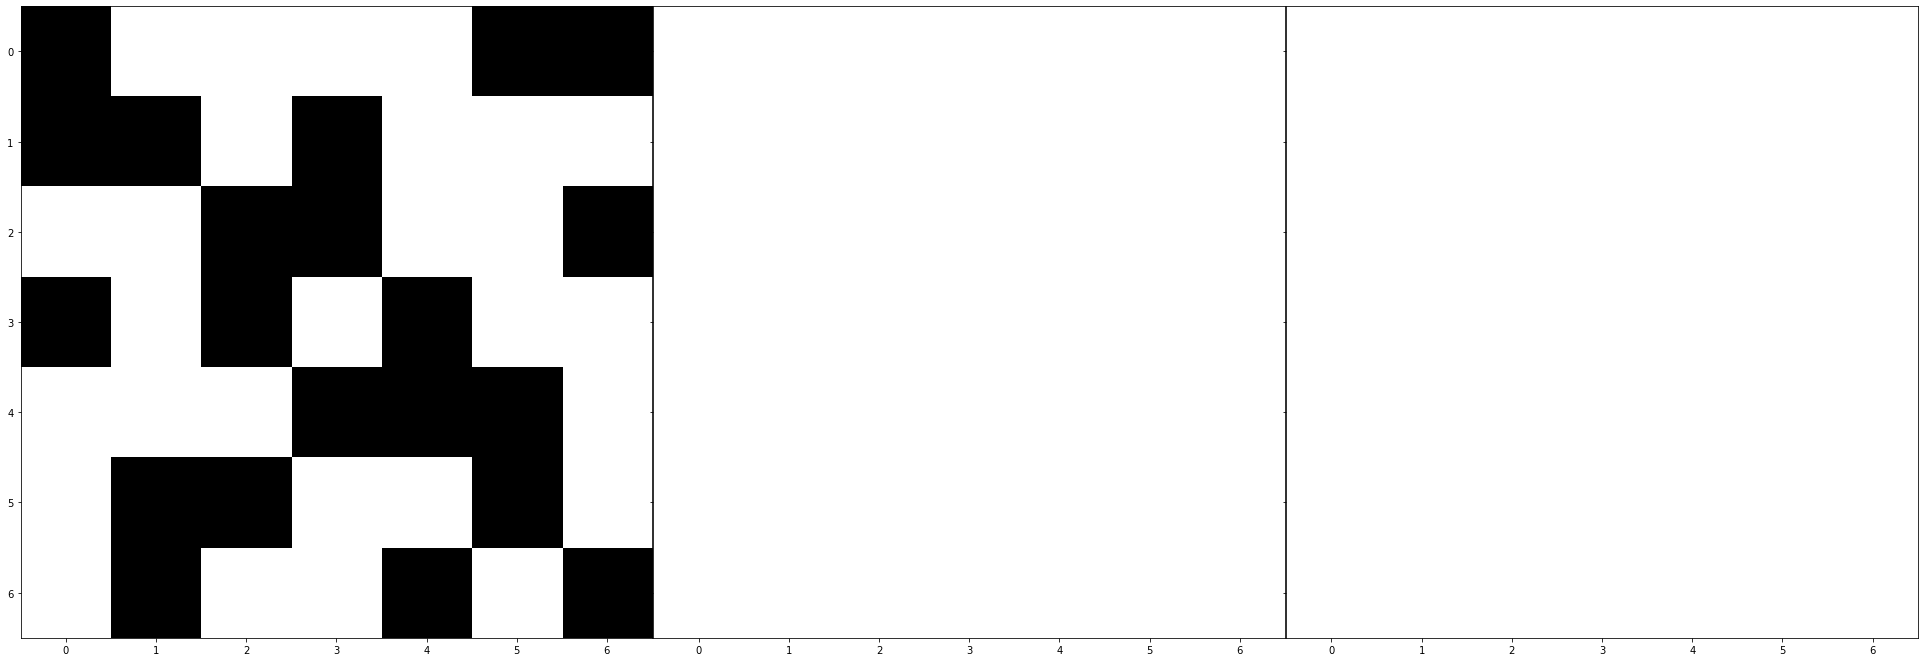

In [11]:
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3))
for ax, im in zip(grid, [fragment.I, fragment.EH.T, fragment.Hi]):
    ax.imshow(im, cmap=cm.binary)

# Calculating the degree matrix

The degree matrix can be calculated as a simple tensor operation:

In [12]:
np.tensordot(fragment.V.T, fragment.I.T, axes=([1,0],[1,0]))

array([6., 6., 6., 6., 6., 6., 6.])

# Calculating the adjacency matrix

The adjacecny matrix can be calculated as the following tensor product:

In [19]:
np.tensordot(fragment.V.T, fragment.I.T, axes=([1,0],[1,0]))

array([6., 6., 6., 6., 6., 6., 6.])

# Multi tree example

In [14]:
taxon, graph = create_multitree()
fragment_tree = setup_test_graph_elements(taxon, graph)

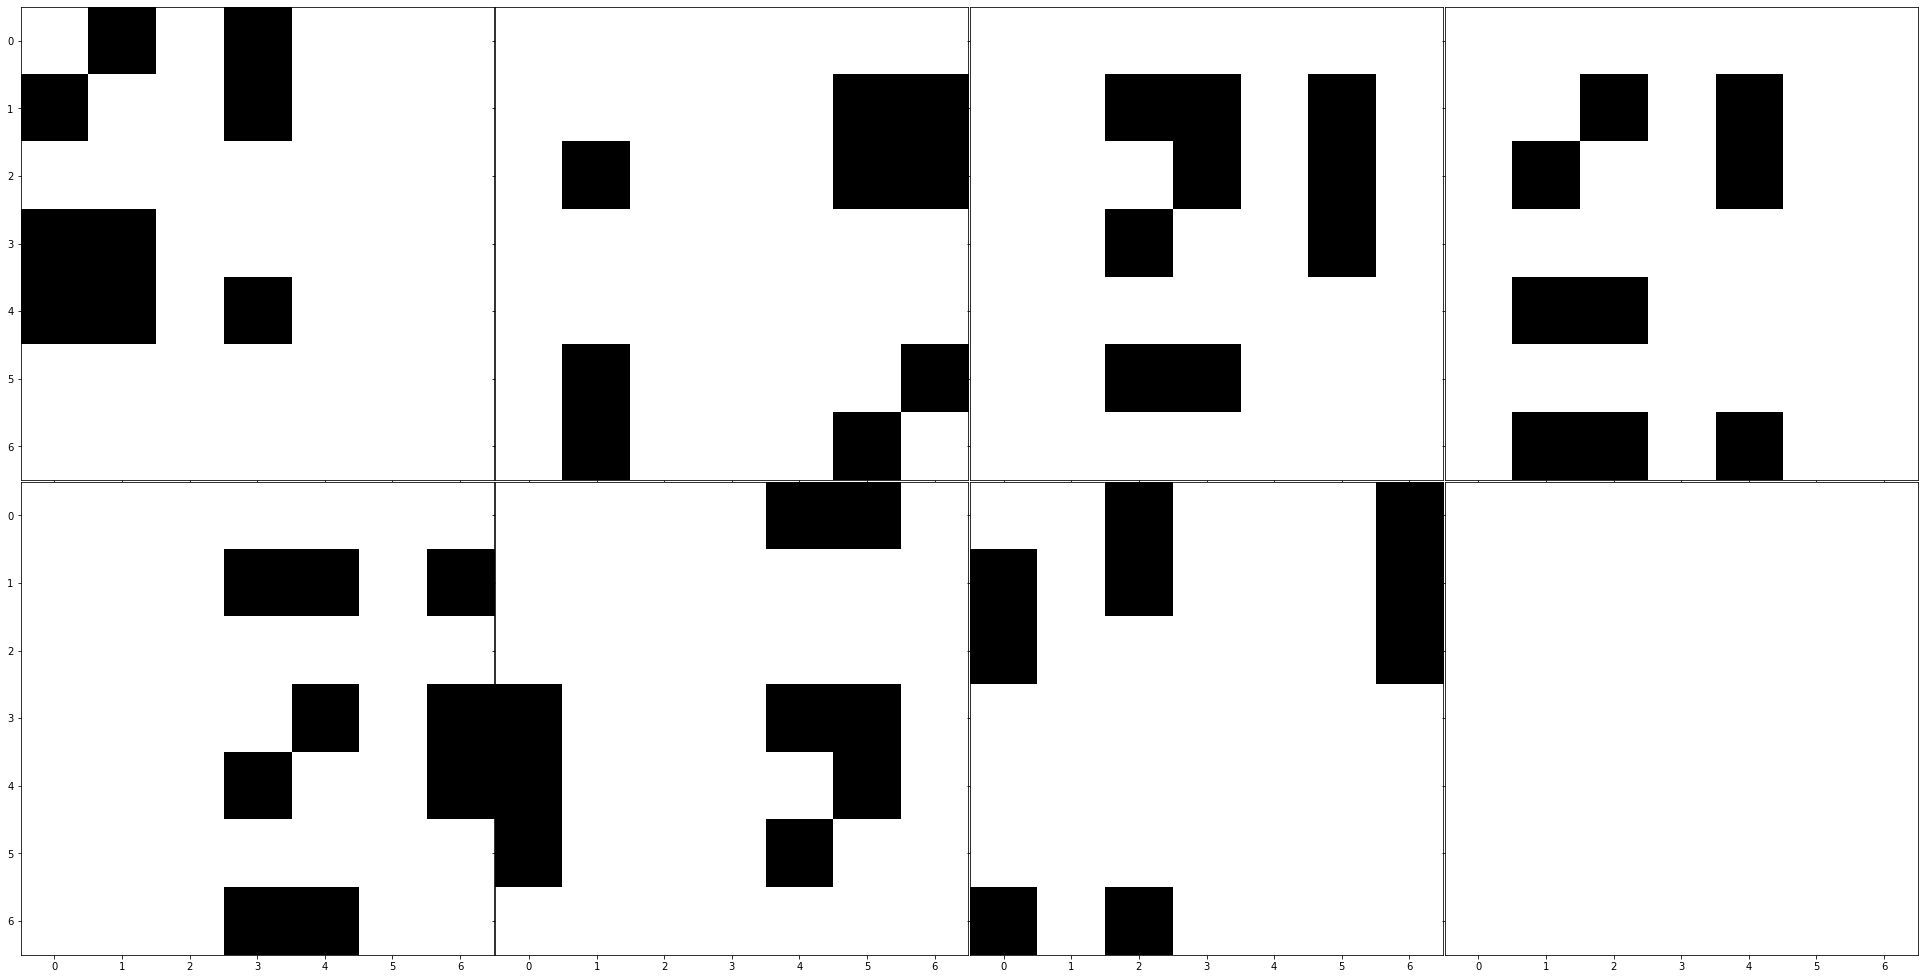

In [17]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 4))
for ax, im in zip(grid, fragment_tree.V.T):
    ax.imshow(im, cmap=cm.binary)